# 收入增长与房价增长对比
1. 有一个传说，程序员的收入是跟房价一起增长的，那么我们拿历史数据来分析一下吧。
2. 收入数据来自国家统计局官网 www.stats.gov.cn

In [ ]:
#加载收入数据
import pandas as pd
income = pd.read_csv('otherdata/收入数据.csv', index_col = 0)
income.index = [x[:-1] for x in income.index]

In [ ]:
#加载北京房价数据并计算每年均价
from common import read
df = read('北京')
df['year'] = [x[:4] for x in df['成交时间']]
housePrice = df.groupby('year')['成交价(元/平)'].mean()

In [32]:
#2010年之前成交量太少，房价数据不可靠
housePriceDf = pd.DataFrame({'北京房价':housePrice.loc[housePrice.index>='2011']})
data = housePriceDf.merge(income, left_index = True, right_index = True, how = 'inner')

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


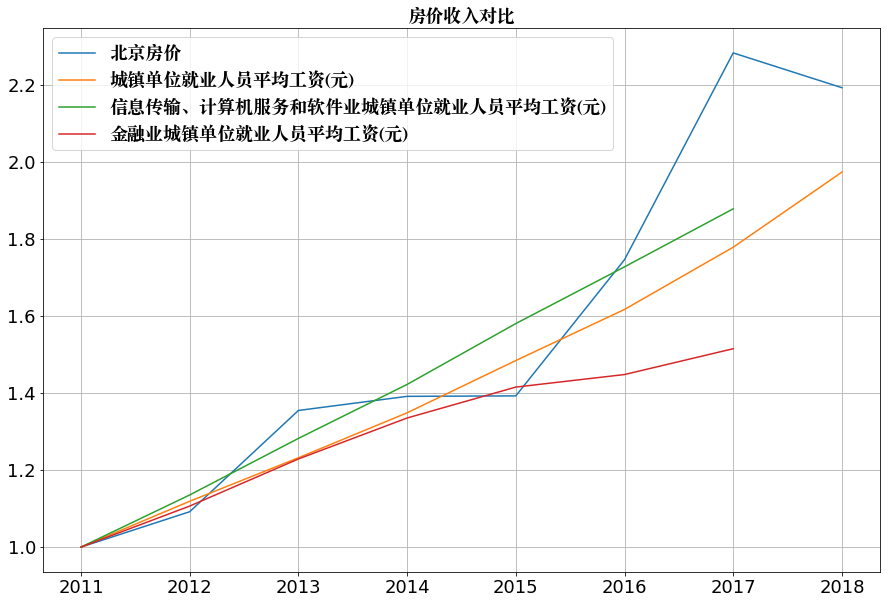

In [95]:
#北京房价相对涨幅与收入相对涨幅对比
import os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
font=FontProperties(fname='font/Songti.ttc',size=18)
title = '房价收入对比'
columns = ['北京房价', '城镇单位就业人员平均工资(元)', 
           '信息传输、计算机服务和软件业城镇单位就业人员平均工资(元)','金融业城镇单位就业人员平均工资(元)']
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rc('font', size=18)
matplotlib.rcParams['figure.figsize'] = [15, 10]
for col in columns:
    plt.plot(data[col]/data[col].iloc[0])
plt.legend(columns, prop = font)
plt.grid(True)
plt.title(title, fontproperties = font)
#重画x轴
dir_name = os.path.join('fig', '房价收入分析')
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
plt.savefig(os.path.join(dir_name, title +'.png'))
plt.show()
plt.close()

In [116]:
#分析一下各行业涨幅对比
rise_ratio = income.loc['2017']/income.loc['2007']
rise_ratio.sort_values(ascending = False)

城镇单位就业人员平均工资(元)
批发和零售业城镇单位就业人员平均工资(元)             3.378618
农、林、牧、渔业城镇单位就业人员平均工资(元)           3.365354
教育城镇单位就业人员平均工资(元)                 3.219546
卫生、社会保障和社会福利业城镇单位就业人员平均工资(元)      3.214112
制造业城镇单位就业人员平均工资(元)                3.048241
建筑业城镇单位就业人员平均工资(元)                3.006601
城镇单位就业人员平均工资(元)                   3.006270
租赁和商务服务业城镇单位就业人员平均工资(元)           2.927069
公共管理和社会组织城镇单位就业人员平均工资(元)          2.898273
文化、体育和娱乐业城镇单位就业人员平均工资(元)          2.885409
交通运输、仓储和邮政业城镇单位就业人员平均工资(元)        2.875139
水利、环境和公共设施管理业城镇单位就业人员平均工资(元)      2.841158
科学研究、技术服务和地质勘查业城镇单位就业人员平均工资(元)    2.805345
信息传输、计算机服务和软件业城镇单位就业人员平均工资(元)     2.791405
金融业城镇单位就业人员平均工资(元)                2.791370
电力、燃气及水的生产和供应业城镇单位就业人员平均工资(元)     2.699373
住宿和餐饮业城镇单位就业人员平均工资(元)             2.683973
房地产业城镇单位就业人员平均工资(元)               2.655818
居民服务和其他服务业城镇单位就业人员平均工资(元)         2.481689
采矿业城镇单位就业人员平均工资(元)                2.465851
dtype: float64

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


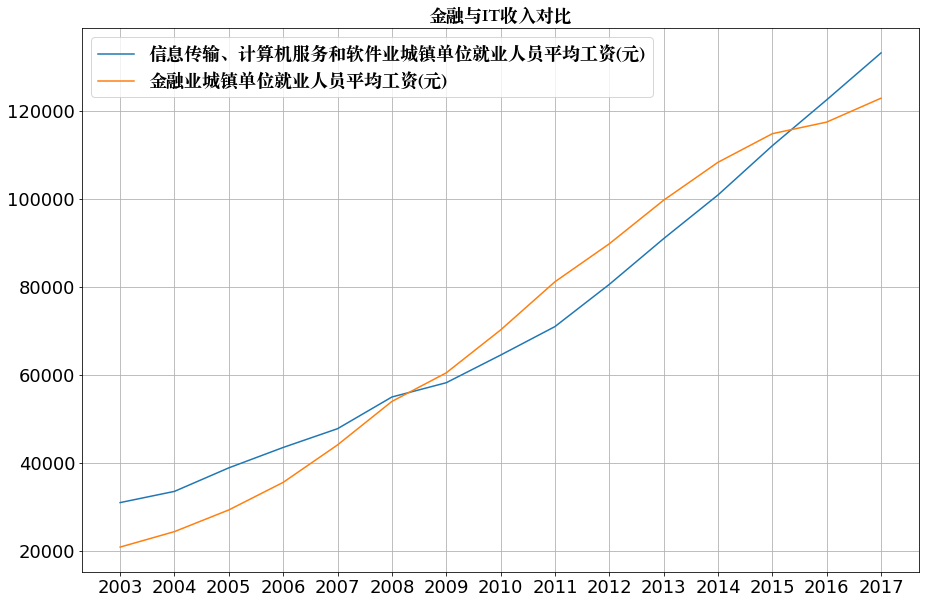

In [70]:
#金融与IT对比
font=FontProperties(fname='font/Songti.ttc',size=18)
title = '金融与IT收入对比'
columns = ['信息传输、计算机服务和软件业城镇单位就业人员平均工资(元)','金融业城镇单位就业人员平均工资(元)']
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rc('font', size=18)
matplotlib.rcParams['figure.figsize'] = [15, 10]
for col in columns:
    plt.plot(income[col])
plt.legend(columns, prop = font)
plt.grid(True)
plt.title(title, fontproperties = font)
#重画x轴
dir_name = os.path.join('fig', '房价收入分析')
if not os.path.exists(dir_name):
    os.makedirs(dir_name)
plt.savefig(os.path.join(dir_name, title +'.png'))
plt.show()
plt.close()

In [58]:
rise = income.copy()
for col in rise.columns:
    for i in range(len(rise) - 1):
        rise[col].iloc[i+1] = '%.1f%%'%((income[col].iloc[i+1]/income[col].iloc[i]-1) * 100)
rise

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,城镇单位就业人员平均工资(元),农、林、牧、渔业城镇单位就业人员平均工资(元),采矿业城镇单位就业人员平均工资(元),制造业城镇单位就业人员平均工资(元),电力、燃气及水的生产和供应业城镇单位就业人员平均工资(元),建筑业城镇单位就业人员平均工资(元),交通运输、仓储和邮政业城镇单位就业人员平均工资(元),信息传输、计算机服务和软件业城镇单位就业人员平均工资(元),批发和零售业城镇单位就业人员平均工资(元),住宿和餐饮业城镇单位就业人员平均工资(元),金融业城镇单位就业人员平均工资(元),房地产业城镇单位就业人员平均工资(元),租赁和商务服务业城镇单位就业人员平均工资(元),科学研究、技术服务和地质勘查业城镇单位就业人员平均工资(元),水利、环境和公共设施管理业城镇单位就业人员平均工资(元),居民服务和其他服务业城镇单位就业人员平均工资(元),教育城镇单位就业人员平均工资(元),卫生、社会保障和社会福利业城镇单位就业人员平均工资(元),文化、体育和娱乐业城镇单位就业人员平均工资(元),公共管理和社会组织城镇单位就业人员平均工资(元)
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2001,16.1%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2002,14.2%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2003,12.9%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2004,14.0%,8.9%,23.1%,12.5%,16.0%,11.0%,14.7%,8.3%,19.4%,12.7%,16.9%,8.1%,10.0%,14.2%,9.4%,8.0%,13.4%,13.6%,20.0%,13.1%
2005,14.3%,9.5%,21.9%,11.8%,14.9%,12.2%,15.7%,16.0%,17.2%,10.0%,20.3%,9.7%,13.4%,16.3%,11.2%,15.1%,13.5%,13.2%,10.5%,16.5%
2006,14.6%,12.9%,18.0%,14.4%,14.8%,14.5%,15.3%,11.9%,16.6%,9.8%,21.4%,9.8%,15.4%,16.5%,9.1%,14.5%,14.6%,13.4%,14.0%,11.4%
2007,18.5%,17.0%,16.8%,16.0%,17.8%,14.3%,15.7%,9.8%,18.4%,11.9%,24.0%,17.3%,13.5%,21.5%,17.6%,13.0%,23.9%,18.2%,17.7%,23.0%
2008,16.9%,15.8%,21.5%,15.4%,15.1%,14.8%,14.8%,15.1%,22.5%,13.3%,22.5%,15.5%,18.4%,18.4%,14.8%,12.2%,15.1%,15.4%,12.3%,16.5%


In [67]:
prior_cols = ['城镇单位就业人员平均工资(元)',
              '信息传输、计算机服务和软件业城镇单位就业人员平均工资(元)',
                              '金融业城镇单位就业人员平均工资(元)',
              '卫生、社会保障和社会福利业城镇单位就业人员平均工资(元)',
                             '制造业城镇单位就业人员平均工资(元)',
                             '农、林、牧、渔业城镇单位就业人员平均工资(元)']
prior_cols.extend(list(set(rise.columns) - set(prior_cols)))
rise.loc[rise.index >='2004',prior_cols]

,城镇单位就业人员平均工资(元),信息传输、计算机服务和软件业城镇单位就业人员平均工资(元),金融业城镇单位就业人员平均工资(元),卫生、社会保障和社会福利业城镇单位就业人员平均工资(元),制造业城镇单位就业人员平均工资(元),农、林、牧、渔业城镇单位就业人员平均工资(元),租赁和商务服务业城镇单位就业人员平均工资(元),居民服务和其他服务业城镇单位就业人员平均工资(元),公共管理和社会组织城镇单位就业人员平均工资(元),文化、体育和娱乐业城镇单位就业人员平均工资(元),教育城镇单位就业人员平均工资(元),水利、环境和公共设施管理业城镇单位就业人员平均工资(元),交通运输、仓储和邮政业城镇单位就业人员平均工资(元),房地产业城镇单位就业人员平均工资(元),电力、燃气及水的生产和供应业城镇单位就业人员平均工资(元),建筑业城镇单位就业人员平均工资(元),住宿和餐饮业城镇单位就业人员平均工资(元),批发和零售业城镇单位就业人员平均工资(元),采矿业城镇单位就业人员平均工资(元),科学研究、技术服务和地质勘查业城镇单位就业人员平均工资(元)
2004,14.0%,8.3%,16.9%,13.6%,12.5%,8.9%,10.0%,8.0%,13.1%,20.0%,13.4%,9.4%,14.7%,8.1%,16.0%,11.0%,12.7%,19.4%,23.1%,14.2%
2005,14.3%,16.0%,20.3%,13.2%,11.8%,9.5%,13.4%,15.1%,16.5%,10.5%,13.5%,11.2%,15.7%,9.7%,14.9%,12.2%,10.0%,17.2%,21.9%,16.3%
2006,14.6%,11.9%,21.4%,13.4%,14.4%,12.9%,15.4%,14.5%,11.4%,14.0%,14.6%,9.1%,15.3%,9.8%,14.8%,14.5%,9.8%,16.6%,18.0%,16.5%
2007,18.5%,9.8%,24.0%,18.2%,16.0%,17.0%,13.5%,13.0%,23.0%,17.7%,23.9%,17.6%,15.7%,17.3%,17.8%,14.3%,11.9%,18.4%,16.8%,21.5%
2008,16.9%,15.1%,22.5%,15.4%,15.4%,15.8%,18.4%,12.2%,16.5%,12.3%,15.1%,14.8%,14.8%,15.5%,15.1%,14.8%,13.3%,22.5%,21.5%,18.4%
2009,11.6%,5.9%,12.1%,10.8%,9.9%,14.3%,7.8%,10.1%,9.4%,10.5%,15.8%,9.7%,10.2%,7.1%,8.7%,13.8%,8.0%,12.9%,11.1%,10.2%
2010,13.3%,10.8%,16.1%,12.8%,15.3%,16.4%,11.5%,12.1%,8.3%,9.7%,12.8%,10.3%,14.6%,11.3%,13.0%,13.9%,12.1%,15.4%,16.2%,12.4%
2011,14.4%,10.1%,15.6%,14.8%,18.6%,16.5%,18.7%,17.6%,10.0%,15.6%,10.8%,13.0%,16.3%,19.4%,11.4%,16.6%,17.6%,20.9%,18.2%,14.0%
2012,11.9%,13.5%,10.6%,13.8%,13.6%,16.5%,13.2%,5.9%,9.5%,11.9%,10.5%,12.0%,13.4%,9.2%,10.4%,13.6%,13.8%,14.0%,9.0%,7.8%
2013,10.1%,12.9%,11.0%,10.3%,11.5%,13.8%,17.6%,9.4%,6.9%,10.8%,8.8%,11.7%,8.6%,9.2%,15.3%,15.3%,8.9%,8.6%,5.6%,10.6%


In [92]:
income_t = income.loc[income.index>='2011']
income_t = income_t.transpose()
print(" "*22,'城镇单位就业人员平均工资(元)')
income_t.index = [x[:x.find('城镇单位就业人员平均工资(元)')] for x in income_t.index]
income_t.index = ["全行业" if x == "" else x for x in income_t.index]
income_t.sort_values('2017', ascending = False)

                       城镇单位就业人员平均工资(元)


,2011,2012,2013,2014,2015,2016,2017,2018
信息传输、计算机服务和软件业,70918.0,80510.0,90915.0,100845.0,112042.0,122478.0,133150.0,NaN
金融业,81109.0,89743.0,99653.0,108273.0,114777.0,117418.0,122851.0,NaN
科学研究、技术服务和地质勘查业,64252.0,69254.0,76602.0,82259.0,89410.0,96638.0,107815.0,NaN
电力、燃气及水的生产和供应业,52723.0,58202.0,67085.0,73339.0,78886.0,83863.0,90348.0,NaN
卫生、社会保障和社会福利业,46206.0,52564.0,57979.0,63267.0,71624.0,80026.0,89648.0,NaN
文化、体育和娱乐业,47878.0,53558.0,59336.0,64375.0,72764.0,79875.0,87803.0,NaN
教育,43194.0,47734.0,51950.0,56580.0,66592.0,74498.0,83412.0,NaN
租赁和商务服务业,46976.0,53162.0,62538.0,67131.0,72489.0,76782.0,81393.0,NaN
公共管理和社会组织,42062.0,46074.0,49259.0,53110.0,62323.0,70959.0,80372.0,NaN
交通运输、仓储和邮政业,47078.0,53391.0,57993.0,63416.0,68822.0,73650.0,80225.0,NaN


# 医疗行业什么时候超过IT
在美国等发达国家，医疗行业收入是比IT要高的。咱们来分析一下中国的情况。
根据2011年到2017年的涨幅，以及2017年的基数预测，将来多少年之后医疗可以赶上IT。结论是大概2048年。

/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


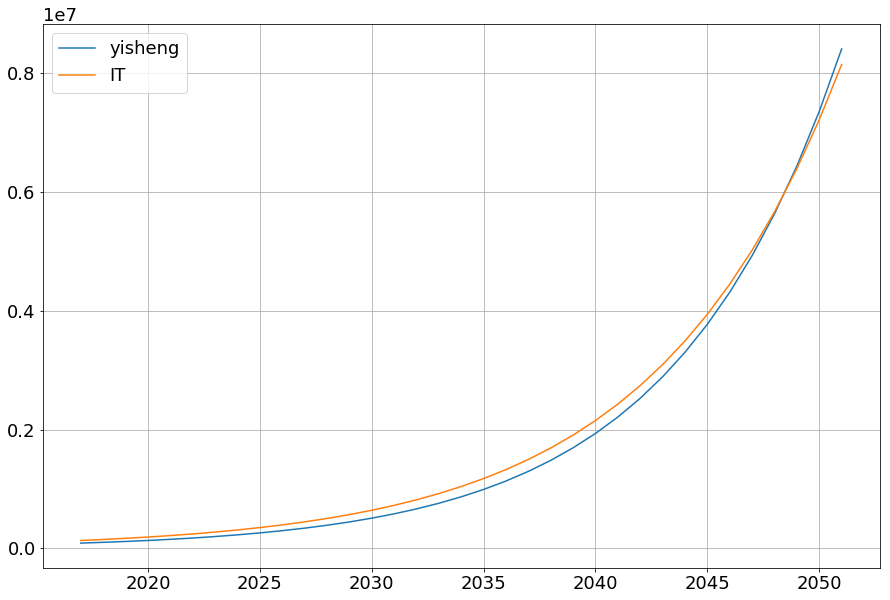

In [114]:
yishengRate = 2.228276 
ITRate = 2.066391
yishengBase = 89648.0
ITBase = 133150.0
def f(base, rate, year):
    return base * rate **(year/6)
count = 35
yisheng = [f(yishengBase, yishengRate, n) for n in range(count)]
IT = [f(ITBase, ITRate, n) for n in range(count)]
year = [2017 + n for n in range(count)]
plt.plot(year, yisheng)
plt.plot(year, IT)
plt.legend(['yisheng', 'IT'])
plt.grid(True)
plt.show()